# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

2021-09-26 06:28:51.050635: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# Function to help in loading the dataset
def load_tfds_dataset(source:str, BUFFER_SIZE = 10000, BATCH_SIZE = 64):
    # source variable contains the name of dataset being loaded from tfds
    
    data, info = tfds.load(source, with_info = True, as_supervised = True)
    train_data, test_data = data['train'], data['test']
    train_data = train_data.shuffle(BUFFER_SIZE)
    train_data = train_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_data))
    test_data = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

    return train_data, test_data

In [3]:
# Functions to help in plotting graphs to compare the accuracy and losses of different models.

def plot_graphs(history, string, axis):
    axis.plot((history.history)[string])
    axis.plot((history.history)['val_'+string])


def compare_models(histories:list, num_cols = 2):
    num_rows = len(histories)
    fig, axes = plt.subplots(num_rows, num_cols)
    axarr = axes.flat

    for i, history in enumerate(histories):
        plot_graphs(history, 'accuracy', axarr[2*i])
        plot_graphs(history, 'loss', axarr[2*i + 1])

In [4]:
# Loading the train and test data using the function defined above
# The string used as source should exactly match the name in list of datasets available in tfds

train_data, test_data = load_tfds_dataset('imdb_reviews/subwords8k')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZIQZTU/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZIQZTU/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZIQZTU/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


2021-09-26 06:31:33.304494: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-26 06:31:33.307365: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-26 06:31:33.354550: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-26 06:31:33.355152: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-26 06:31:33.355238: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-26 06:31:33.382157: I tensorflow/stream_executor/platform/def

# Definition of Various models with different parameters and layers
    -> Different models have been defined that use different parameters and layers.
    -> Inclusion and Exclusion of LSTMs, GRUs, and CNNs shall be tried and the effects are to be noted from the graphs.

In [5]:
# Model 1 is trained with an embedding layer and dense layers
Model_1 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(10000, 64),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
], name = 'Model_1')

Model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = 'accuracy'
)

Model_1.summary()

Model: "Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 642,625
Trainable params: 642,625
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Model 2 is made with Embedding Layer and Dense Layers with different params as compared to model 1
Model_2 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(10000, 16),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
], name = 'Model_2')

Model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = 'accuracy'
)

Model_2.summary()

Model: "Model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 161,089
Trainable params: 161,089
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Model 3 uses LSTM for taking into account Sequential Behaviour of Text data.
# LSTM is different from general RNNs as it's cells include "Cell State" that help to carry important details for longer times.
Model_3 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(10000, 16),
                             tf.keras.layers.LSTM(32),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
], name = 'Model_3')

Model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = 'accuracy'
)

Model_3.summary()

Model: "Model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                6272      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 167,089
Trainable params: 167,089
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Module 4 uses Bidirectional RNNs that help to take into consideration words in a text that come after the context word to predict the meaning of the context word.
Model_4 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(10000, 32),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
], name = 'Model_4')

Model_4.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = 'accuracy'
)

Model_4.summary()

Model: "Model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense_9 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 372,017
Trainable params: 372,017
Non-trainable params: 0
_________________________________________________________________


In [9]:
Model_5 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(10000, 32),
                             # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Conv1D(128, 5, activation = 'relu'),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
], name = 'Model_5')

Model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = 'accuracy'
)

Model_5.summary()

Model: "Model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         20608     
_________________________________________________________________
dense_12 (Dense)             (None, None, 16)          2064      
_________________________________________________________________
dense_13 (Dense)             (None, None, 16)          272       
_________________________________________________________________
dense_14 (Dense)             (None, None, 1)           17        
Total params: 342,961
Trainable params: 342,961
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model 6 is composed of 2 RNN layers.
Model_6 = tf.keras.Sequential([
                             tf.keras.layers.Embedding(10000, 32),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
], name = 'Model_6')

Model_6.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = 'accuracy'
)

Model_6.summary()

Model: "Model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         49664     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_15 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 470,833
Trainable params: 470,833
Non-trainable params: 0
_____________________________________________________

# Beginning of training of models

In [11]:
start = datetime.now()
history_1 = Model_1.fit(train_data, epochs = 10, validation_data = test_data)
end = datetime.now()
print(f"Estimated Time elapsed for training {Model_1.name} is : {(end - start).seconds} seconds")

Epoch 1/10


2021-09-26 06:31:37.914211: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-26 06:31:37.920896: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000140000 Hz
2021-09-26 06:31:38.043714: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


  3/391 [..............................] - ETA: 15s - loss: 0.6939 - accuracy: 0.4731  

2021-09-26 06:31:39.164432: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


391/391 [==============================] - 14s 31ms/step - loss: 0.6772 - accuracy: 0.5706 - val_loss: 0.4292 - val_accuracy: 0.8371
Epoch 2/10
391/391 [==============================] - 12s 29ms/step - loss: 0.3565 - accuracy: 0.8600 - val_loss: 0.3266 - val_accuracy: 0.8662
Epoch 3/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2508 - accuracy: 0.9087 - val_loss: 0.3149 - val_accuracy: 0.8731
Epoch 4/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2027 - accuracy: 0.9261 - val_loss: 0.3220 - val_accuracy: 0.8776
Epoch 5/10
391/391 [==============================] - 12s 29ms/step - loss: 0.1852 - accuracy: 0.9324 - val_loss: 0.3459 - val_accuracy: 0.8709
Epoch 6/10
391/391 [==============================] - 13s 30ms/step - loss: 0.1581 - accuracy: 0.9453 - val_loss: 0.3480 - val_accuracy: 0.8708
Epoch 7/10
391/391 [==============================] - 12s 29ms/step - loss: 0.1492 - accuracy: 0.9463 - val_loss: 0.3628 - val_accuracy: 0.8716
Epo

In [12]:
start = datetime.now()
history_2 = Model_2.fit(train_data, epochs = 10, validation_data = test_data)
end = datetime.now()
print(f"Estimated Time elapsed for training {Model_2.name} is : {(end - start).seconds} seconds")

Epoch 1/10
391/391 [==============================] - 8s 17ms/step - loss: 0.6818 - accuracy: 0.5469 - val_loss: 0.4890 - val_accuracy: 0.7677
Epoch 2/10
391/391 [==============================] - 8s 19ms/step - loss: 0.3952 - accuracy: 0.8445 - val_loss: 0.3275 - val_accuracy: 0.8710
Epoch 3/10
391/391 [==============================] - 8s 18ms/step - loss: 0.2718 - accuracy: 0.8973 - val_loss: 0.3075 - val_accuracy: 0.8792
Epoch 4/10
391/391 [==============================] - 7s 17ms/step - loss: 0.2278 - accuracy: 0.9128 - val_loss: 0.3055 - val_accuracy: 0.8811
Epoch 5/10
391/391 [==============================] - 8s 17ms/step - loss: 0.1962 - accuracy: 0.9291 - val_loss: 0.3090 - val_accuracy: 0.8821
Epoch 6/10
391/391 [==============================] - 8s 19ms/step - loss: 0.1771 - accuracy: 0.9367 - val_loss: 0.3234 - val_accuracy: 0.8783
Epoch 7/10
391/391 [==============================] - 7s 17ms/step - loss: 0.1626 - accuracy: 0.9432 - val_loss: 0.3352 - val_accuracy: 0.8785

In [13]:
start = datetime.now()
history_3 = Model_3.fit(train_data, epochs = 10, validation_data = test_data)
end = datetime.now()
print(f"Estimated Time elapsed for training {Model_3.name} is : {(end - start).seconds} seconds")

Epoch 1/10


2021-09-26 06:35:02.204432: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


391/391 [==============================] - 34s 70ms/step - loss: 0.6932 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 2/10
391/391 [==============================] - 27s 67ms/step - loss: 0.6927 - accuracy: 0.5043 - val_loss: 0.6928 - val_accuracy: 0.5005
Epoch 3/10
391/391 [==============================] - 28s 70ms/step - loss: 0.6913 - accuracy: 0.5018 - val_loss: 0.6933 - val_accuracy: 0.4997
Epoch 4/10
391/391 [==============================] - 28s 69ms/step - loss: 0.6904 - accuracy: 0.5028 - val_loss: 0.6934 - val_accuracy: 0.5007
Epoch 5/10
391/391 [==============================] - 28s 70ms/step - loss: 0.6900 - accuracy: 0.4971 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 6/10
391/391 [==============================] - 28s 70ms/step - loss: 0.6897 - accuracy: 0.5012 - val_loss: 0.6930 - val_accuracy: 0.5024
Epoch 7/10
391/391 [==============================] - 28s 69ms/step - loss: 0.6895 - accuracy: 0.5040 - val_loss: 0.6950 - val_accuracy: 0.5002
Epo

In [14]:
start = datetime.now()
history_4 = Model_4.fit(train_data, epochs = 10, validation_data = test_data)
end = datetime.now()
print(f"Estimated Time elapsed for training {Model_4.name} is : {(end - start).seconds} seconds")

Epoch 1/10
391/391 [==============================] - 66s 160ms/step - loss: 0.6926 - accuracy: 0.5136 - val_loss: 0.6862 - val_accuracy: 0.6327
Epoch 2/10
391/391 [==============================] - 63s 158ms/step - loss: 0.6673 - accuracy: 0.5995 - val_loss: 0.6177 - val_accuracy: 0.6769
Epoch 3/10
391/391 [==============================] - 63s 159ms/step - loss: 0.5833 - accuracy: 0.6930 - val_loss: 0.5405 - val_accuracy: 0.7519
Epoch 4/10
391/391 [==============================] - 63s 160ms/step - loss: 0.4973 - accuracy: 0.7612 - val_loss: 0.4402 - val_accuracy: 0.8046
Epoch 5/10
391/391 [==============================] - 64s 161ms/step - loss: 0.3025 - accuracy: 0.8830 - val_loss: 0.3702 - val_accuracy: 0.8507
Epoch 6/10
391/391 [==============================] - 63s 160ms/step - loss: 0.2778 - accuracy: 0.8894 - val_loss: 0.3838 - val_accuracy: 0.8443
Epoch 7/10
391/391 [==============================] - 64s 161ms/step - loss: 0.2232 - accuracy: 0.9179 - val_loss: 0.3753 - val_ac

In [15]:
start = datetime.now()
history_5 = Model_5.fit(train_data, epochs = 10, validation_data = test_data)
end = datetime.now()
print(f"Estimated Time elapsed for training {Model_5.name} is : {(end - start).seconds} seconds")

Epoch 1/10
391/391 [==============================] - 20s 47ms/step - loss: 0.6901 - accuracy: 0.5110 - val_loss: 0.6849 - val_accuracy: 0.5243
Epoch 2/10
391/391 [==============================] - 16s 38ms/step - loss: 0.6828 - accuracy: 0.5316 - val_loss: 0.6850 - val_accuracy: 0.5240
Epoch 3/10
391/391 [==============================] - 13s 32ms/step - loss: 0.6823 - accuracy: 0.5283 - val_loss: 0.6845 - val_accuracy: 0.5246
Epoch 4/10
391/391 [==============================] - 13s 31ms/step - loss: 0.6816 - accuracy: 0.5282 - val_loss: 0.6853 - val_accuracy: 0.5252
Epoch 5/10
391/391 [==============================] - 14s 34ms/step - loss: 0.6810 - accuracy: 0.5295 - val_loss: 0.6842 - val_accuracy: 0.5263
Epoch 6/10
391/391 [==============================] - 12s 30ms/step - loss: 0.6804 - accuracy: 0.5347 - val_loss: 0.6840 - val_accuracy: 0.5265
Epoch 7/10
391/391 [==============================] - 13s 32ms/step - loss: 0.6794 - accuracy: 0.5417 - val_loss: 0.6838 - val_accuracy:

In [16]:
start = datetime.now()
history_6 = Model_6.fit(train_data, epochs = 10, validation_data = test_data)
end = datetime.now()
print(f"Estimated Time elapsed for training {Model_6.name} is : {(end - start).seconds} seconds")

Epoch 1/10
391/391 [==============================] - 122s 298ms/step - loss: 0.6038 - accuracy: 0.6525 - val_loss: 0.3906 - val_accuracy: 0.8414
Epoch 2/10
391/391 [==============================] - 118s 299ms/step - loss: 0.3821 - accuracy: 0.8386 - val_loss: 0.6208 - val_accuracy: 0.7356
Epoch 3/10
391/391 [==============================] - 121s 307ms/step - loss: 0.5706 - accuracy: 0.7136 - val_loss: 0.4911 - val_accuracy: 0.7835
Epoch 4/10
391/391 [==============================] - 122s 309ms/step - loss: 0.3653 - accuracy: 0.8534 - val_loss: 0.4526 - val_accuracy: 0.8146
Epoch 5/10
391/391 [==============================] - 121s 306ms/step - loss: 0.2852 - accuracy: 0.8949 - val_loss: 0.4820 - val_accuracy: 0.7802
Epoch 6/10
391/391 [==============================] - 122s 309ms/step - loss: 0.2806 - accuracy: 0.8916 - val_loss: 0.4617 - val_accuracy: 0.8319
Epoch 7/10
391/391 [==============================] - 120s 304ms/step - loss: 0.2384 - accuracy: 0.9139 - val_loss: 0.4349 -

# All Models have been trained

In [17]:
# compare_models([Model_1, Model_2, Model_3, Model_4, Model_5])
# The function seems fine, not working. Any help would be grateful and is welcome.

In [19]:
histories = [history_1, history_2, history_3, history_4, history_5, history_6]

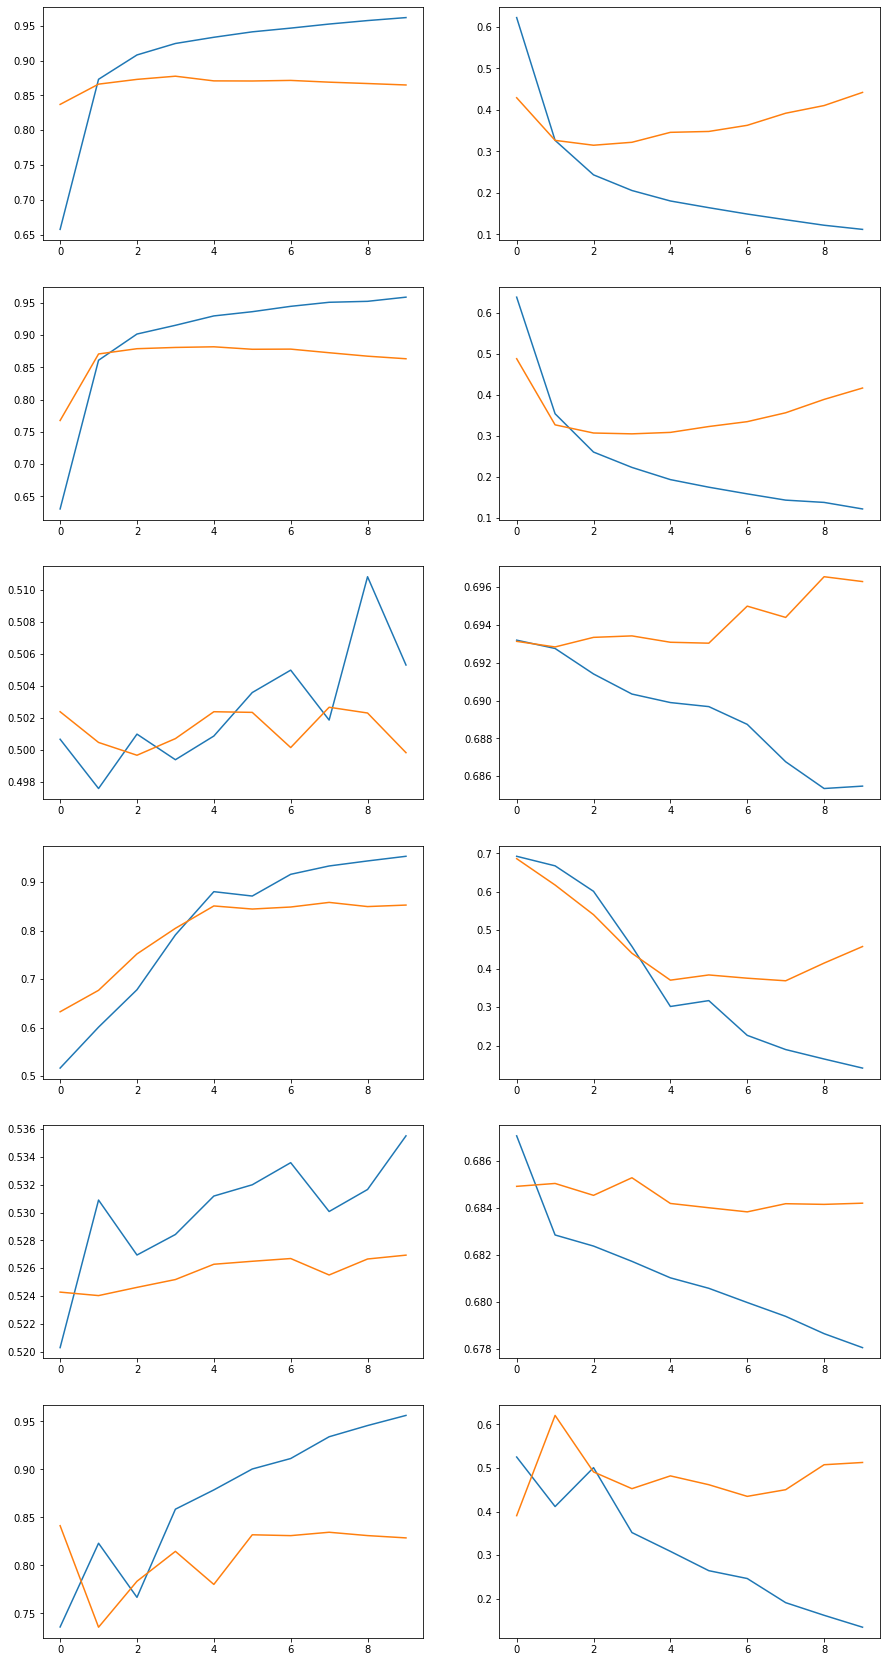

In [20]:
num_rows = len(histories)
fig, axes = plt.subplots(num_rows, 2, figsize = (15, 30))
axarr = axes.flat

for i, history in enumerate(histories):
    plot_graphs(history, 'accuracy', axarr[2*i])
    plot_graphs(history, 'loss', axarr[2*i + 1])

# Analysis of Performance Of Models
    -> All of the models show high overfitting.
    -> Even though there is rise in accuracy of train dataset, the confidence in prediction is decreasing as shown in loss (2nd Column of graphs).